# Generate Exercise One data

In [11]:
variables = {
  "provincia": [
    "Buenos Aires",
    "CABA",
    "Catamarca",
    "Chaco",
    "Chubut",
    "Córdoba",
    "Corrientes",
    "Entre Ríos",
    "Formosa",
    "Jujuy",
    "La Pampa",
    "La Rioja",
    "Mendoza",
    "Misiones",
    "Neuquén",
    "Río Negro",
    "Salta",
    "San Juan",
    "San Luis",
    "Santa Cruz",
    "Santa Fe",
    "Santiago del Estero",
    "Tierra del Fuego",
    "Tucumán"
  ],
  "centro_de_salud_cercano":["True", "False"],
  "estadio_al_momento_de_diagnostica":["I", "II", "III", "IV"],
  "consulta_en_el_ano_previo_al_diagnostico":["True", "False"],
  "cobertura_de_salud": ["Publico", "Proveedor A", "Proveedor B", "Proveedor C"],
  "edad": ["menos_de_40", "entre_40_y_50", "entre_50_y_60", "mas_de_60"],
  "comorbilidad_cardiaca":["True", "False"],
  "comorbilidad_sistema_digestivo":["True", "False"],
  "comorbilidad_sistema_endocrino":["True", "False"],
  "tamano_tumor": ["pequeno", "mediano", "grande"],
  "estado_nodos_linfatico": ["positivo", "negativo"],
  "estado_receptor_hormonas": ["ER", "PR", "ER/PR", "Ninguno"],
  "grado_diferenciacion_tumor": ["bajo", "medio", "alto"]
}

In [12]:
# with open("freqs.txt", "w", encoding="utf8") as f_out:
#   for k, vs in variables.items():
#     for v in vs:
#       f_out.write(f"{k}, {v}, 0\n")

In [6]:
from collections import defaultdict
import pandas as pd
import numpy as np

freqs = {
  "Buenos Aires": 15_771_581,
  "Córdoba": 3_384_649,
  "Santa Fe": 3_269_134,
  "Mendoza": 1_780_854,
  "Tucumán": 1_494_358,
  "Entre Ríos": 1_259_903,
  "Salta": 1_243_386,
  "Misiones": 1_117_121,
  "Chaco": 1_083_740,
  "Corrientes": 1_021_242,
  "Santiago del Estero": 883_684,
  "San Juan": 698_476,
  "Jujuy": 685_870,
  "Río Negro": 650_511,
  "Neuquén": 573_881,
  "Formosa": 553_528,
  "Chubut": 515_203,
  "San Luis": 445_477,
  "Catamarca": 378_977,
  "La Rioja": 343_765,
  "La Pampa": 328_155,
  "Santa Cruz": 276_407,
  "Tierra del Fuego": 132_116,
  "CABA": 3_038_430,
}

total_pop = sum(freqs.values())
total_pop
freqs = {
  k: t/total_pop for k, t in freqs.items()
}
freqs = [list(x) for x in freqs.items()]
freqs = (
  pd.DataFrame(freqs, columns = ["Province", "freq"])
    .sort_values("freq")
    .assign(
      cumfreq = lambda x: x.freq.cumsum()
    )
    .sort_values("freq", ascending = False)
    .reset_index(drop=True)
)

r_prov = np.random.choice(
  a=freqs.Province,
  size=100,
  p=freqs.freq
)

prov_close_map = defaultdict(int)
prov_close_map["CABA"] = 1
prov_close_map["Buenos Aires"] = 1
prov_close_map["Santa Fe"] = 1
prov_close_map["Córdoba"] = 1

r_prov2 = np.array([
  prov_close_map[x]
  for x in r_prov
])
r_prov2

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [2]:
freqs

,Province,freq,cumfreq
0,Buenos Aires,0.385326,1.000000
1,Córdoba,0.082693,0.614674
2,Santa Fe,0.079870,0.531981
3,CABA,0.074234,0.452110
4,Mendoza,0.043509,0.377876
5,Tucumán,0.036510,0.334367
6,Entre Ríos,0.030782,0.297858
7,Salta,0.030378,0.267076
8,Misiones,0.027293,0.236698
9,Chaco,0.026478,0.209405


In [12]:
centro_de_salud_cercano = np.random.choice(["False", "True"], 100, [0.25, 0.75])
centro_de_salud_cercano

array(['False', 'False', 'True', 'False', 'False', 'True', 'False',
       'False', 'True', 'True', 'True', 'False', 'False', 'False',
       'False', 'False', 'True', 'False', 'True', 'True', 'False', 'True',
       'True', 'True', 'False', 'False', 'True', 'False', 'True', 'False',
       'True', 'True', 'False', 'True', 'False', 'True', 'False', 'True',
       'True', 'True', 'False', 'True', 'False', 'False', 'True', 'True',
       'True', 'False', 'True', 'True', 'True', 'True', 'False', 'False',
       'False', 'False', 'False', 'False', 'True', 'False', 'False',
       'True', 'True', 'False', 'False', 'True', 'True', 'True', 'False',
       'False', 'False', 'True', 'True', 'False', 'False', 'False',
       'False', 'True', 'False', 'False', 'True', 'False', 'False',
       'True', 'False', 'True', 'False', 'False', 'False', 'False',
       'True', 'True', 'False', 'True', 'False', 'False', 'False',
       'False', 'False', 'True'], dtype='<U5')

In [4]:

import scipy

def mutate(var: np.ndarray) -> np.ndarray:
  var = var.copy()
  indexes = np.arange(len(var))
  np.random.shuffle(indexes)
  a, b = tuple(indexes[0:2])
  var[[a, b]] = var[[b, a]]
  return var

def pick_best_mutation(var, fixed_var, fixed_var_map, mut_var_map):
  max_ass = 0
  max_ass_index = 0
  mutations = [mutate(var) for _ in range(100)]
  mapped_fixed = np.array([fixed_var_map[x] for x in fixed_var])
  for i, m in enumerate(mutations):
    mapped_m = np.array([mut_var_map[x] for x in m])
    ct = scipy.stats.contingency.crosstab(mapped_m, mapped_fixed)
    ass = scipy.stats.contingency.association(ct[1])
    if ass > max_ass:
      max_ass = ass
      max_ass_index = i
  return ass, mutations[max_ass_index]

def associate(
    fixed_var,
    mut_var,
    target_ass,
    fixed_var_map,
    mut_var_map,
    max_steps=10,
  ):
  for _ in range(max_steps):
    c_ass, mut_var = pick_best_mutation(
      mut_var,
      fixed_var,
      fixed_var_map,
      mut_var_map
    )
    if c_ass > target_ass:
      return mut_var
  return mut_var


In [13]:
r_prov

array(['Buenos Aires', 'Buenos Aires', 'Córdoba', 'Entre Ríos',
       'Buenos Aires', 'Buenos Aires', 'Buenos Aires', 'Buenos Aires',
       'Santa Cruz', 'Córdoba', 'Mendoza', 'Buenos Aires', 'Buenos Aires',
       'Tucumán', 'Buenos Aires', 'Mendoza', 'Córdoba', 'CABA',
       'Misiones', 'Chaco', 'CABA', 'Santa Fe', 'CABA', 'Buenos Aires',
       'Buenos Aires', 'Tucumán', 'CABA', 'Salta', 'Mendoza', 'Tucumán',
       'Buenos Aires', 'Buenos Aires', 'Córdoba', 'San Juan', 'Santa Fe',
       'Buenos Aires', 'Buenos Aires', 'CABA', 'Santa Fe', 'Buenos Aires',
       'Buenos Aires', 'Buenos Aires', 'Buenos Aires', 'Buenos Aires',
       'Buenos Aires', 'Mendoza', 'Buenos Aires', 'CABA', 'Buenos Aires',
       'Buenos Aires', 'Buenos Aires', 'Buenos Aires', 'Buenos Aires',
       'Buenos Aires', 'Buenos Aires', 'Santa Fe', 'Río Negro', 'Neuquén',
       'Santa Fe', 'Buenos Aires', 'Misiones', 'CABA', 'CABA', 'Córdoba',
       'Buenos Aires', 'Córdoba', 'Formosa', 'Buenos Aires',
      

In [15]:
m1 = prov_close_map
m2 = {
  "True": 1,
  "False": 0
}
centro_2 = associate(r_prov, centro_de_salud_cercano, 0.3, m1, m2, 10)
centro_2



array(['False', 'False', 'True', 'False', 'False', 'True', 'False',
       'True', 'True', 'True', 'True', 'False', 'False', 'False', 'True',
       'False', 'True', 'False', 'False', 'True', 'False', 'True', 'True',
       'True', 'False', 'False', 'True', 'False', 'False', 'False',
       'True', 'True', 'False', 'True', 'False', 'True', 'False', 'True',
       'True', 'True', 'False', 'True', 'False', 'False', 'True', 'True',
       'True', 'False', 'True', 'True', 'True', 'True', 'True', 'False',
       'False', 'False', 'False', 'False', 'True', 'False', 'False',
       'True', 'True', 'True', 'False', 'True', 'False', 'True', 'False',
       'False', 'False', 'True', 'False', 'False', 'False', 'False',
       'True', 'True', 'False', 'False', 'True', 'False', 'False', 'True',
       'False', 'True', 'False', 'False', 'False', 'False', 'True',
       'False', 'False', 'False', 'False', 'False', 'True', 'False',
       'False', 'True'], dtype='<U5')

In [16]:
pd.DataFrame(r_prov, centro_2)

,0
False,Buenos Aires
False,Buenos Aires
True,Córdoba
False,Entre Ríos
False,Buenos Aires
...,...
False,San Luis
True,CABA
False,La Pampa
False,Mendoza


In [ ]:
Correlaciones:


provincia y centro_de_salud_cercano



estadio_al_momento_de_diagnostica y tamano_tumor



estadio_al_momento_de_diagnostica y grado_diferenciacion_tumor




In [91]:
base_freqs = (
  pd
    .read_csv("freqs.txt", header=None, sep=",")
    .rename(columns = {0:"var", 1:"value", 2:"freq"})
)
base_freqs

data = (
  pd
    .DataFrame(
      range(3500),
      columns = ["i"]
    )
)

for var, df in base_freqs.groupby("var", group_keys=True):
  data[var] = np.random.choice(
    df["value"],
    size = len(data),
    p = df["freq"]
  )


mapping_prov = defaultdict(int)
mapping_prov["CABA"] = 1
mapping_prov["Buenos Aires"] = 1
mapping_prov["Santa Fe"] = 1
mapping_prov["Córdoba"] = 1

mapping_centro_cercano = {
  "True" : 1,
  "False": 0
}

mapping_stage = {
  "I" : 0,
  "II" : 0,
  "III" : 1,
  "IV" : 2
}

mapping_size = {
  "pequeno" : 0,
  "mediano": 1,
  "grande": 2,
}

mapping_diff = {
  "bajo": 0,
  "medio": 1,
  "alto": 2
}

centroa = associate(
  data["provincia"],
  data["centro_de_salud_cercano"],
  0.3,
  mapping_prov,
  mapping_centro_cercano,
  10
)

sizea = associate(
  data["estadio_al_momento_de_diagnostica"],
  data["tamano_tumor"],
  0.3,
  mapping_stage,
  mapping_size,
  10
)

diffa = associate(
  data["estadio_al_momento_de_diagnostica"],
  data["grado_diferenciacion_tumor"],
  0.3,
  mapping_stage,
  mapping_diff
)

data.assign(
  centro_de_salud_cercano = centroa,
  tamano_tumor = sizea,
  grado_diferenciacion_tumor = diffa
)
data.to_csv("exercise1_data.csv")

In [96]:

model = (
  pd.read_csv(
    "coeff.txt",
    sep=",",
    header=None
  )
  .rename(columns = {0:"var", 1:"value", 2:"coef"})
)
model


,var,value,coef
0,provincia,Buenos Aires,0.025
1,provincia,CABA,0.010
2,provincia,Catamarca,0.030
3,provincia,Chaco,0.090
4,provincia,Chubut,0.030
5,provincia,Córdoba,0.050
6,provincia,Corrientes,0.040
7,provincia,Entre Ríos,0.040
8,provincia,Formosa,0.080
9,provincia,Jujuy,0.020


In [104]:
data

,i,centro_de_salud_cercano,cobertura_de_salud,comorbilidad_cardiaca,comorbilidad_sistema_digestivo,comorbilidad_sistema_endocrino,consulta_en_el_ano_previo_al_diagnostico,edad,estadio_al_momento_de_diagnostica,estado_nodos_linfatico,estado_receptor_hormonas,grado_diferenciacion_tumor,provincia,tamano_tumor
0,0,True,Proveedor B,False,False,False,False,entre_40_y_50,IV,negativo,PR,bajo,Chaco,pequeno
1,1,False,Publico,False,False,False,False,entre_40_y_50,II,positivo,PR,medio,La Rioja,pequeno
2,2,True,Publico,False,False,False,False,menos_de_40,II,negativo,Ninguno,bajo,Corrientes,pequeno
3,3,True,Publico,False,False,False,False,mas_de_60,II,negativo,Ninguno,alto,Buenos Aires,mediano
4,4,True,Publico,False,False,False,False,entre_40_y_50,I,negativo,Ninguno,medio,Entre Ríos,pequeno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,False,Proveedor A,False,False,False,False,entre_40_y_50,II,negativo,Ninguno,bajo,Buenos Aires,pequeno
3496,3496,True,Publico,False,True,False,False,entre_50_y_60,I,negativo,Ninguno,alto,Buenos Aires,pequeno
3497,3497,False,Proveedor A,False,True,False,False,menos_de_40,IV,positivo,Ninguno,bajo,San Juan,pequeno
3498,3498,True,Proveedor C,True,False,False,False,menos_de_40,I,negativo,Ninguno,alto,La Rioja,pequeno


In [151]:
values = (
  data
    .iloc[:,1:]
    .apply(
      lambda x: pd.DataFrame(x)
        .reset_index()
        .set_axis(["index", 0], axis=1).columns,
      axis = 1
    )
)




In [152]:
values

0       Index(['index', 0], dtype='object')
1       Index(['index', 0], dtype='object')
2       Index(['index', 0], dtype='object')
3       Index(['index', 0], dtype='object')
4       Index(['index', 0], dtype='object')
                       ...                 
3495    Index(['index', 0], dtype='object')
3496    Index(['index', 0], dtype='object')
3497    Index(['index', 0], dtype='object')
3498    Index(['index', 0], dtype='object')
3499    Index(['index', 0], dtype='object')
Length: 3500, dtype: object

In [153]:
values = (
  data
    .iloc[:,1:]
    .apply(
      lambda x:
        pd.merge(
          pd.DataFrame(x)
            .reset_index()
            .set_axis(["index", 0], axis=1),
          model.reset_index(),
          left_on=["index", 0],
          right_on=["var", "value"]
        )["coef"].sum(),
      axis = 1
    )
)


In [173]:
values_error = values + np.random.normal(0, scale=1.4, size=3500)
positive = values_error > values_error.quantile(0.91)
positive

data["sobrevida_a_cinco_anos"] = positive.map(lambda x: not x)

In [189]:
data.drop(["i"], axis=1).to_csv("exercise_one_data", index=False)

In [125]:
pd.merge(
  values.iloc[0].reset_index(),
  model.reset_index(),
  left_on=["index", 0],
  right_on=["var", "value"]
)["coef"].sum()


2.04

In [26]:
from typing import Any
from random import choice

def create_pacient_data(variables) -> list[Any]:
  pacient = []
  for k in sorted(variables):
    elements = variables[k]
    pacient.append(choice(elements))
  return pacient

lot_of_pacients = [
  create_pacient_data(variables)
  for _ in range(1000000)
]


In [50]:
import pandas as pd
df = pd.DataFrame(
  lot_of_pacients,
  columns = sorted(variables)
)

df.head()

,centro_de_salud_cercano,cobertura_de_salud,comorbilidad_cardiaca,comorbilidad_sistema_digestivo,comorbilidad_sistema_endocrino,consulta_en_el_ano_previo_al_diagnostico,edad,estadio_al_momento_de_diagnostica,estado_nodos_linfatico,estado_receptor_hormonas,grado_diferenciacion_tumor,provincia,tamano_tumor
0,True,Proveedor C,False,True,True,False,entre_50_y_60,II,negativo,Ninguno,medio,Jujuy,grande
1,False,Proveedor B,True,True,True,True,mas_de_60,III,positivo,PR,medio,Chaco,pequeno
2,True,Proveedor A,True,True,True,False,entre_40_y_50,IV,positivo,ER,alto,Chubut,grande
3,True,Proveedor C,False,True,False,False,mas_de_60,IV,positivo,Ninguno,medio,Tucumán,mediano
4,False,Proveedor A,False,False,True,True,entre_40_y_50,IV,negativo,ER/PR,medio,La Pampa,grande


In [200]:
import prince
import matplotlib.pyplot as plt

data2 = pd.read_csv("exercise_one_data", sep=",").apply(lambda x:x.astype(str))

n_elems = 100



In [199]:
data2.apply(
  lambda x: x.astype(str)
)


,centro_de_salud_cercano,cobertura_de_salud,comorbilidad_cardiaca,comorbilidad_sistema_digestivo,comorbilidad_sistema_endocrino,consulta_en_el_ano_previo_al_diagnostico,edad,estadio_al_momento_de_diagnostica,estado_nodos_linfatico,estado_receptor_hormonas,grado_diferenciacion_tumor,provincia,tamano_tumor,sobrevida_a_cinco_anos
0,True,Proveedor B,False,False,False,False,entre_40_y_50,IV,negativo,PR,bajo,Chaco,pequeno,True
1,False,Publico,False,False,False,False,entre_40_y_50,II,positivo,PR,medio,La Rioja,pequeno,True
2,True,Publico,False,False,False,False,menos_de_40,II,negativo,Ninguno,bajo,Corrientes,pequeno,True
3,True,Publico,False,False,False,False,mas_de_60,II,negativo,Ninguno,alto,Buenos Aires,mediano,True
4,True,Publico,False,False,False,False,entre_40_y_50,I,negativo,Ninguno,medio,Entre Ríos,pequeno,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,False,Proveedor A,False,False,False,False,entre_40_y_50,II,negativo,Ninguno,bajo,Buenos Aires,pequeno,True
3496,True,Publico,False,True,False,False,entre_50_y_60,I,negativo,Ninguno,alto,Buenos Aires,pequeno,True
3497,False,Proveedor A,False,True,False,False,menos_de_40,IV,positivo,Ninguno,bajo,San Juan,pequeno,True
3498,True,Proveedor C,True,False,False,False,menos_de_40,I,negativo,Ninguno,alto,La Rioja,pequeno,True


In [219]:
data2.columns

Index(['centro_de_salud_cercano', 'cobertura_de_salud',
       'comorbilidad_cardiaca', 'comorbilidad_sistema_digestivo',
       'comorbilidad_sistema_endocrino',
       'consulta_en_el_ano_previo_al_diagnostico', 'edad',
       'estadio_al_momento_de_diagnostica', 'estado_nodos_linfatico',
       'estado_receptor_hormonas', 'grado_diferenciacion_tumor', 'provincia',
       'tamano_tumor', 'sobrevida_a_cinco_anos'],
      dtype='object')

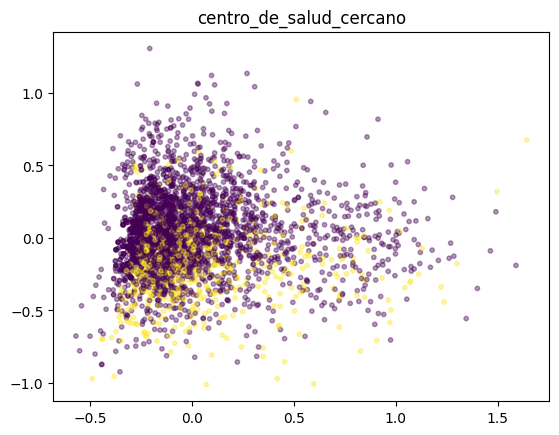

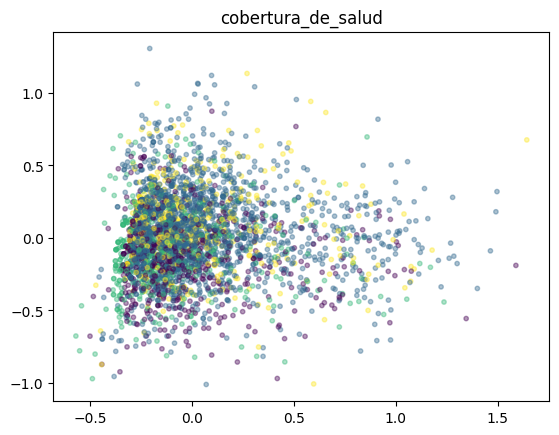

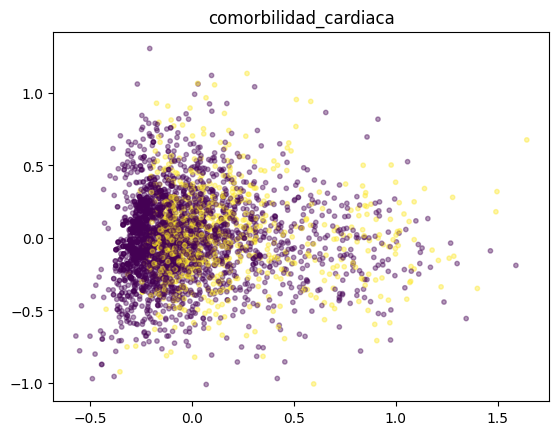

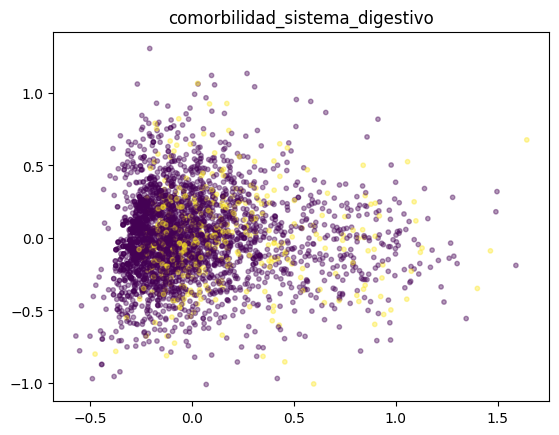

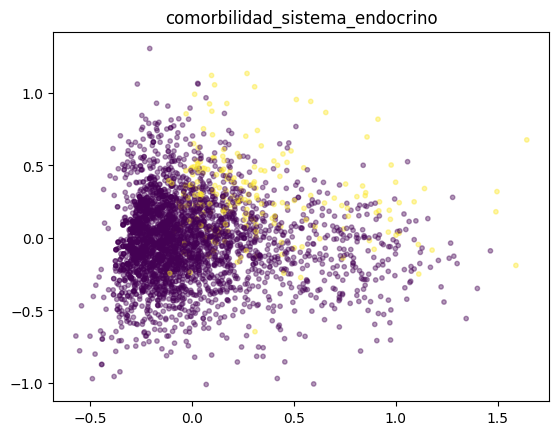

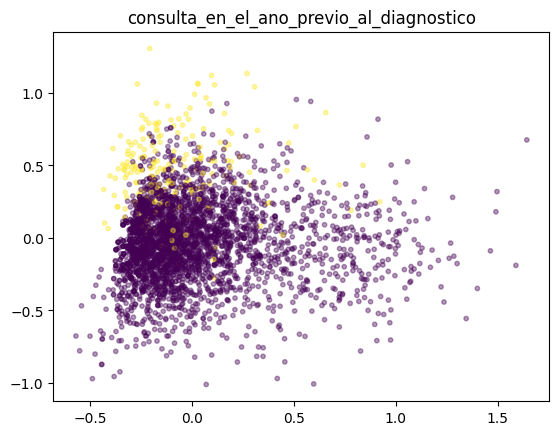

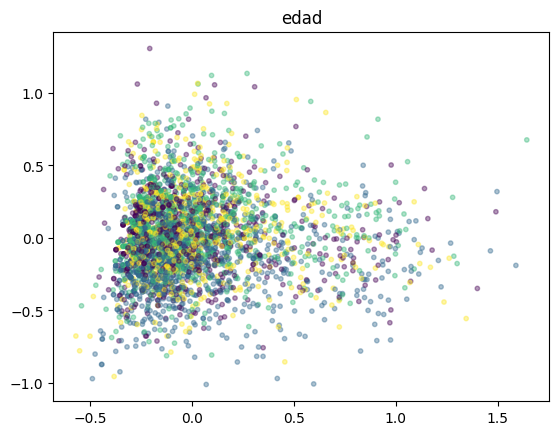

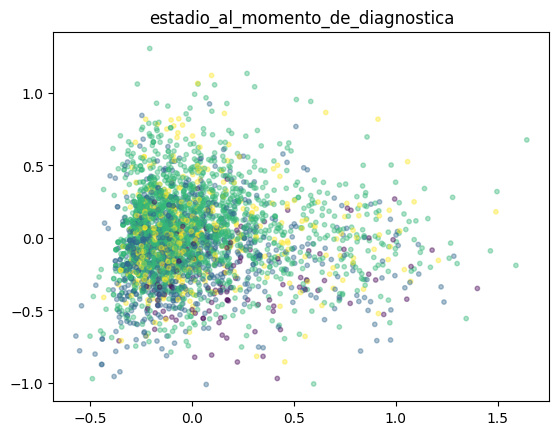

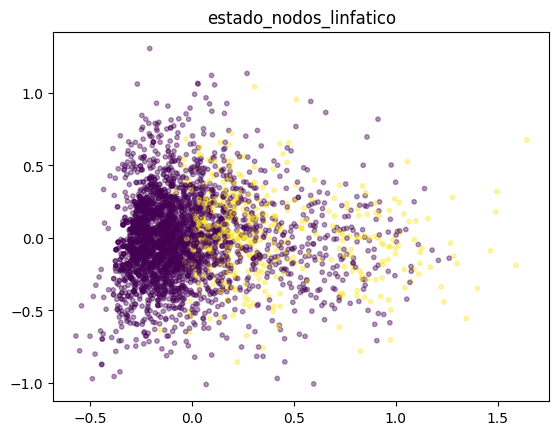

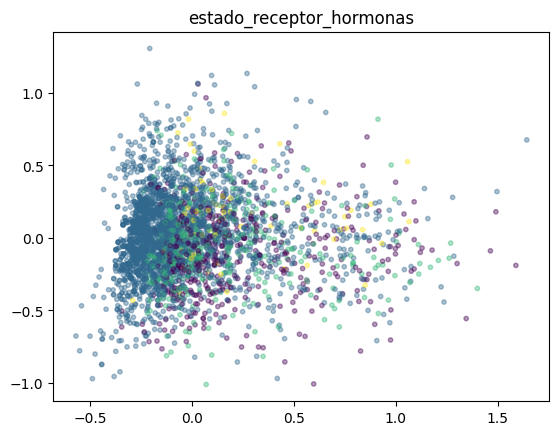

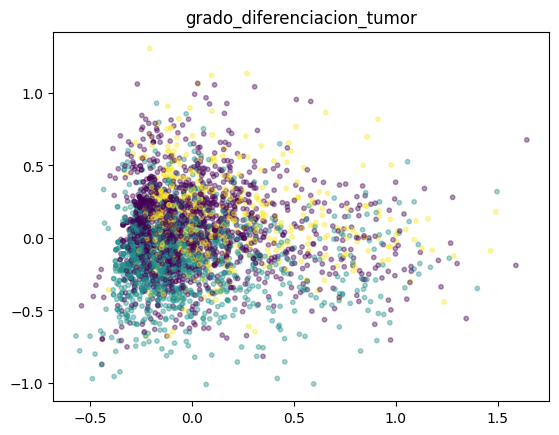

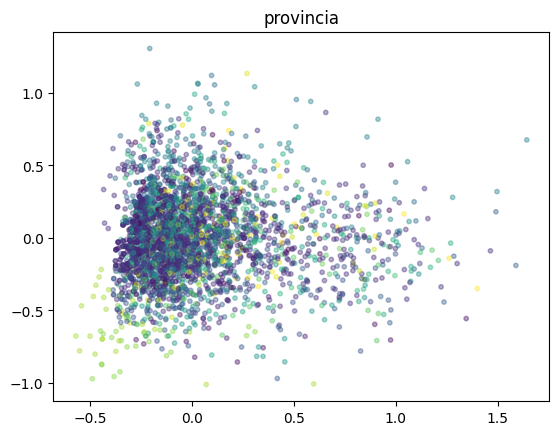

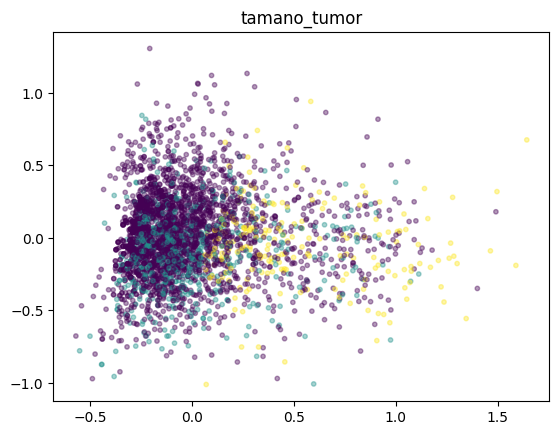

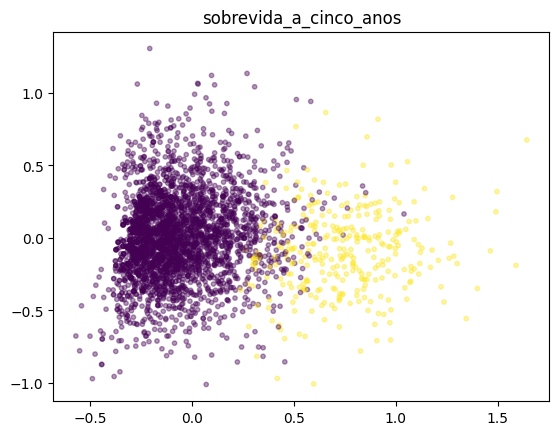

In [224]:
n_elems=3500
mca = prince.MCA(n_components=6)
fitted = mca.fit(data2.iloc[0:n_elems, :])
transformed = mca.transform(data2.iloc[0:n_elems, :])

for cat in data2.columns:
  mapper = {v:k for k,v in enumerate(data2[cat].unique())}
  colors = data2[cat].map(mapper)
  fig, axes = plt.subplots()
  axes.scatter(
    transformed.iloc[:, 0],
    transformed.iloc[:, 1],
    c = colors,
    s = 10,
    alpha=0.4
  )
  axes.set_title(cat)




# legend_elements = scatter.legend_elements()
# plt.legend(legend_elements[0], ["G1", "G2", "G3"])
# plt.xlabel(F"Dimension 1 (Inertia: {100*fitted.explained_inertia_[0]:0.3f})%")
# plt.ylabel(F"Dimension 2 (Inertia: {100*fitted.explained_inertia_[1]:0.3f})%")